# 开普勒三定律

## 开普勒定律的发现  
开普勒定律由三个定律组成$^{[1]}$：

1. 行星运行在椭圆轨道上，太阳位于椭圆的焦点上 
2. 在椭圆轨道平面上，行星在单位时间划过的面积是相等的 
3. 行星绕太阳公转的周期 T 与公转椭圆轨道的半长轴（长轴的一半）a 满足数量关系： $ T^2 \propto a^3$ 


前两个定律由开普勒于 1609 年在《新宇宙学》（Astronomia nova）一书中提出，    
第三定律由开普勒于 1619 年在《宇宙的和谐》（Harmonices Mundi）一书中提出，  
值得注意的是开普勒测量行星与太阳距离的方法$^{[2]}$，结合观测到的角度，可以绘出行星运行的轨道 ,  
另外第三定律的提出过程异常艰辛，开普勒花了 9 年时间分析观测数据，才得出一个统一的结论。  

## 评述：    
高山仰止，开普勒在那么艰苦的环境下，长年坚持不懈地观测、分析、写作，让人不得不为之赞叹，也为自己的怠惰而汗颜。   
从牛顿定律和万有引力定律出发去看开普勒三定律，应该能很方便的理解其内容，下面进行分析。  


首先，论证开普勒定律所描述的内容符合牛顿定律和万有引力定律。

### I. 论证开普勒第一定律符合牛顿定律和万有引力定律

考虑两体之间在万有引力作用下相对运动，问题归结为在牛顿定律和万有引力定律框架下，求出相对运动的轨道。  

万有引力定律：两个质量分别为$m$和$M$的物体，在相对位置为 $\vec{r}$的情况下，会受到来自对方的力  

$$\vec{F}=\frac{GMm}{r^2}\hat{r}$$,
其中 $\hat{r}$ 为指向对方的单位向量。

牛顿定律： $\vec{F}=m\ddot{\vec{r}}$

以 $\vec{r_1},\vec{r_2}$分别表示 $m$和$M$在惯性系中的位置，联立两个方程可得

$$\frac{GMm}{\vert{\vec{r_1}-\vec{r_2}\vert}^3}(\vec{r_1}-\vec{r_2})=-m\ddot{\vec{r_1}}=M\ddot{\vec{r_2}}$$

于是可知 $m\ddot{\vec{r_1}}+M\ddot{\vec{r_2}}=0$,定义质心坐标为 $\Large{\frac{m\vec{r_1}+M\vec{r_2}}{M+m}}$，可以看出质心相对惯性系没有加速度，因此可设质心系为参考系，设质心坐标为 0

即$\Large{\frac{m\vec{r_1}+M\vec{r_2}}{M+m}=0}$，将 $\vec{r_2}$全部替换为$\vec{r_1}$，可得质量为$m$的物体的运动方程为
$$\frac{GM^3}{(M+m)^2}\frac{\vec{r_1}}{{\vert\vec{r_1}\vert}^3}=-\ddot{\vec{r_1}}$$

问题归结为求解这样一个微分方程，只需证明椭圆轨道是该方程的一个解即可。

#### 用差分方法模拟其运行轨道
考虑 $m$ 在固定的 $y_1-y_2$平面上运动，至于为何确定其运动轨道在一个平面内，以后再讨论，设其在平面内的坐标为$(y_1,y_2)$,   
质心仍在$(0,0)$点, 令 $C=\frac{GM^3}{(M+m)^2}, y_3 = \dot{y_1}, y_4 = \dot{y_2}$,结合运动方程，可得下面的微分方程


$$
\begin{cases}
\large\dot{y_1} = y_3 \\
\large\dot{y_2} = y_4 \\
\large\dot{y_3} = -C\frac{y_1}{(y_1^2+y_2^2)^{3/2}} \\
\large\dot{y_4} = -C\frac{y_2}{(y_1^2+y_2^2)^{3/2}} \\
\end{cases}
$$


写成差分方程是


\begin{cases}
\large y_1(t_1) = y_1(t_0)+y_3\Delta t \\
\large y_2(t_1) = y_2(t_0)+y_4\Delta t \\
\large y_3(t_1) = y_3(t_0)-C\frac{y_1}{(y_1^2+y_2^2)^{3/2}} \Delta t\\
\large y_4(t_1) = y_4(t_0) -C\frac{y_2}{(y_1^2+y_2^2)^{3/2}} \Delta t\\
\end{cases}


下面利用差分法进行数值模拟,模拟结果显示椭圆轨道确实是该微分方程的一个解。  
由此证明了可以用万有引力定定律和牛顿定律来解释开普勒第一定律。

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mplt

#定义一个生成器来产生新的点
def pointGenerator(initPoint, maxSteps):
    #参数设定
    C = 10
    delta_t = 0.00001
    
    
    n = 0
    point = initPoint
    while n < maxSteps:
        yield point
        delta_1 = point[2]*delta_t
        delta_2 = point[3]*delta_t
        delta_3 = -C*delta_t*point[0]/(point[0]**2+point[1]**2)**(3/2)
        delta_4 = -C*delta_t*point[1]/(point[0]**2+point[1]**2)**(3/2)
        point = np.array([delta_1,delta_2,delta_3,delta_4]) + point
        n = n + 1

#迭代次数
n = 1000000
#初值设定,第 1，2 项为初始位置， 第 3，4 项为初始速度
initialValue = np.array([3,0,0,1.2])
#轨道点集
pathway = [point for point in pointGenerator(initialValue, n)]
y1Points = [point[0] for point in pathway]
y2Points = [point[1] for point in pathway]

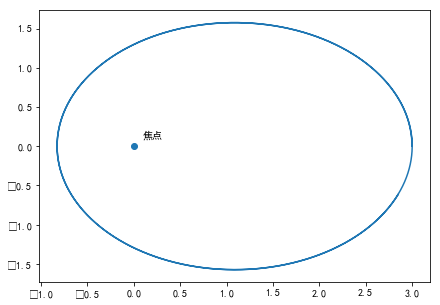

In [110]:
#画出轨道的图像
plt.figure(figsize=(7,5))
plt.plot(y1Points,y2Points)
plt.scatter(0,0)
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.annotate('焦点', xy=(0,0), xytext=(0.1,0.1))
plt.show()

### II. 论证开普勒第二定律符合牛顿定律和万有引力定律

开普勒第二定律的成立源于  牛顿第二定律  和  万有引力是中心力，下面由这两个前提进行推导  

#### 动量守恒
牛顿在《自然哲学的数学原理》中阐述牛顿三定律中的第二定律的时候，没有使用加速度的概念，而是使用了“运动”一词  
他所说的“运动”，即我们现在所称的“动量”。因此，牛顿第二定律的原始表述可以这样理解：“运动”是守恒的，物质  
之间通过力来交换“运动”，“运动”的变化率正比于力。事实上，力的测量完全依赖于测量“运动”（或者说动量）的变化率。  
从这个角度来讲，力并不是本质的东西，只有**运动**才是本质的，但是力的概念有助于我们分析问题。  
而牛顿第二定律可以归结为一句话：**“运动”在物质之间转换，但总量守恒。**

#### 角动量守恒
有了动量守恒，很容易得到角动量守恒。  
取某一点为中心，设系统中每一部分相对中心的位置为 $\vec{r_i}$，相对中心的动量为 $\vec{p_i}, i = 1,2,3...$  
总角动量为$L=\sum_{i}{\vec{r_i}\times\vec{p_i}}$, 由于动量守恒，假设 $j,k$ 两部分之间有动量交换，则必有 $\Delta\vec{p_j}+\Delta\vec{p_k}=0$于是  


$$\Delta L = \vec{r_j}\times\Delta\vec{p_j} + \vec{r_k}\times\Delta\vec{p_k} =  (\vec{r_j}-\vec{r_k})\times\Delta\vec{p_j}=\vec{r_{jk}}\times\Delta\vec{p_j}$$   

由于万有引力在两物质点的连线上，因此$\vec{r_{jk}}$与$\Delta\vec{p_j}$在同一方向上，叉积为 0，角动量守恒得证。   
这里体现出牛顿第三定律的重要性，第三定律说到，相互作用力大小相等，方向相反，这可以由上面总结的**“运动”在物质之间转换，  
但总量守恒** 来解释，但是牛顿第三定律中，“力的方向在同一直线上”是无法由第二定律解释的，而且力的方向不仅要在矢量层面上方向一致，  
还必须在几何空间上处于同一确定的直线。而牛顿第一定律可以理解为：动量是守恒的，在不产生交换的情况下，动量（大小和方向）不变。  
因此可以统一地把牛顿三定律总结为：

**动量是物质的固有属性，动量在物质之间交换，但是总量守恒，以交换动量的两个物质为起点，各自动量的变化的方向为指向，画出的两条直线在空间中重合**  

如何量化动量？我们可以取某个小物件从某一速度变成静止所交换的动量为单位动量，其他物质之间的动量交换都通过这个小物件来传递。  
为了方便起见，我们引入惯性质量的定义，给物质一个动量$\Delta\vec p$,物质产生一个速度的变化 $\Delta{\vec v}$，由于我们能测量  
的有且只有时间和空间，因此可以测出 $\Delta{\vec v}$，（事实上时间和空间也是通过测量  倍数关系来测量的），  
最后我们发现**动量的变化量和速度的变化量方向相同，大小成正比**（在相对论情况下不成正比），于是我们定义一个新的量，惯性质量 

$$m=\frac{\Delta p}{\Delta v}$$


有了惯性质量的定义，我们可以用速度来量化动量了，但在量子力学中，我们还会回归到动量的本质，很少用速度来量化动量，因此质量并不重要。

继续来论证开普勒第二定律。对两体系统，两部分的角动量的变化量分别为$\Delta\vec L_1 = \vec{r_1}\times\Delta\vec{p_1}$和 $\Delta\vec L_2 = \vec{r_2}\times\Delta\vec{p_2}$,  

以质心为中心，则 $\vec{r}$与$\Delta\vec{p}$在同一直线上，因此两部分的角动量分别守恒。  

应用 $\vec{p}=m\vec{v}$, 有 $\vec L = \vec{r}\times\vec{p} = m\vec{r}\times\vec{v}  $  守恒 ,
而$ \vec{r}\times\vec{v}$恰好等于单位时间扫过的面积。得证。

## 参考文献  
[1]  https://en.wikipedia.org/wiki/Astronomia_nova#Kepler's_laws  
[2]  https://baike.baidu.com/item/%E7%BA%A6%E7%BF%B0%E5%B0%BC%E6%96%AF%C2%B7%E5%BC%80%E6%99%AE%E5%8B%92/973574?fr=kg_qa#5_1